In [12]:
# needed functions and libraries
import pandas as pd
import seaborn as sns
from pathlib import Path
import signature_functions as sf

# inputs

In [7]:
config_path = '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.06.22_CJ_batch114/configs.json'
configs = sf.config_reader(config_path)
report_dir = configs['results_folder']
meta_file_path = configs['metadata_annotation']
meta_df = pd.read_excel(meta_file_path)
sf.entity_subtypes = 'code_oncotree'
path_to_file = f'{report_dir}/preprocessed_fp.csv'

# signature by t_test
intensity_file = sf.read_intensity_file(path_to_file,'Gene names')
list_of_interested_entitiese = ['ARMS','LMS','SYNS','ERMS','DDLS','MFH','DSRCT','MPNST','ULMS','ES','LGFMS']

In [17]:
def signature_pipeline(entity):
    # Preprocessing
    
    input_df,list_proteins = sf.prepareDataframeforTest(
                                                        intensity_file,
                                                        meta=meta_df,
                                                        minimum_patients_per_entity = 8,
                                                        protein_expressed_in_at_least_percent = 70)

    # univariate Analysis with Cross_validation
    ROC_univariate_df = sf.univariate_analysis_with_CV_for_all_proteins(input_df,
                                                    list_proteins,
                                                    entity,
                                                    K_folds = 5,
                                                    repeats = 1,
                                                    threshold = 0.7
                                                    )

    # T_test
    first_t_test_result_df = sf.one_vs_all_t_test(
                            input_df,
                            list_proteins,
                            entity,
                            sf.entity_subtypes)
    t_test_univariate_df = first_t_test_result_df.merge(ROC_univariate_df,right_on='names',left_on='Gene Names')
    t_test_univariate_df.to_excel(Path(report_dir)/f'FP_signatures_{entity}.xlsx')
    print(f'{entity}_Finished')
    return 'fnished'

In [18]:
[signature_pipeline(x) for x in list_of_interested_entitiese]

/home/amir/topas/mtb/mtb_portal/flask-backend/notebooks/Signatures/signature_functions.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_df['up_down'][(p_df['means_group1'] < p_df['means_group2'])] = 'down'


ARMS_Finished


/home/amir/topas/mtb/mtb_portal/flask-backend/notebooks/Signatures/signature_functions.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_df['up_down'][(p_df['means_group1'] < p_df['means_group2'])] = 'down'


LMS_Finished


/home/amir/topas/mtb/mtb_portal/flask-backend/notebooks/Signatures/signature_functions.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_df['up_down'][(p_df['means_group1'] < p_df['means_group2'])] = 'down'


SYNS_Finished


/home/amir/topas/mtb/mtb_portal/flask-backend/notebooks/Signatures/signature_functions.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_df['up_down'][(p_df['means_group1'] < p_df['means_group2'])] = 'down'


ERMS_Finished


/home/amir/topas/mtb/mtb_portal/flask-backend/notebooks/Signatures/signature_functions.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_df['up_down'][(p_df['means_group1'] < p_df['means_group2'])] = 'down'


DDLS_Finished


/home/amir/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/home/amir/topas/mtb/mtb_portal/flask-backend/notebooks/Signatures/signature_functions.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_df['up_down'][(p_df['means_group1'] < p_df['means_group2'])] = 'down'


MFH_Finished


/home/amir/topas/mtb/mtb_portal/flask-backend/notebooks/Signatures/signature_functions.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_df['up_down'][(p_df['means_group1'] < p_df['means_group2'])] = 'down'


DSRCT_Finished


/home/amir/topas/mtb/mtb_portal/flask-backend/notebooks/Signatures/signature_functions.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_df['up_down'][(p_df['means_group1'] < p_df['means_group2'])] = 'down'


MPNST_Finished


/home/amir/topas/mtb/mtb_portal/flask-backend/notebooks/Signatures/signature_functions.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_df['up_down'][(p_df['means_group1'] < p_df['means_group2'])] = 'down'


ULMS_Finished


/home/amir/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/home/amir/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/home/amir/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/home/amir/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/amir/.local/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:1018: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/home/amir/.local/

ES_Finished


/home/amir/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/home/amir/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/home/amir/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/home/amir/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/home/amir/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/home/amir/.loc

LGFMS_Finished


['fnished',
 'fnished',
 'fnished',
 'fnished',
 'fnished',
 'fnished',
 'fnished',
 'fnished',
 'fnished',
 'fnished',
 'fnished']

T_test Cross_validaton

In [6]:
CV_reseults = sf.cross_validation_for_one_vs_all_t_test(
                                        input_df,
                                        intensity_file,
                                        meta_df,
                                        entity,
                                        list_proteins,
                                        k_folds = 5,
                                        num_repeats = 1,
                                        p_value_cutoff = None,
                                        fdr_cutoff = .01,
                                        average_difference_twogroups = .5) 

/home/amir/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/home/amir/topas/mtb/mtb_portal/flask-backend/notebooks/Signatures/signature_functions.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_df['up_down'][(p_df['means_group1'] < p_df['means_group2'])] = 'down'
/home/amir/topas/mtb/mtb_portal/flask-backend/notebooks/Signatures/signature_functions.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_df['up_down'][(p_df['means_group1'] < p_df['means_group2'])] = 'down'
/ho

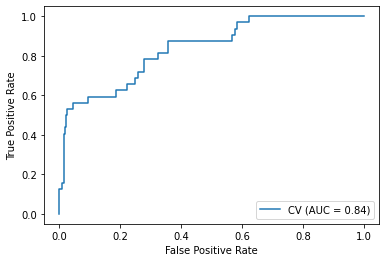

0.8371664325842696

In [7]:
sf.ROC_curve_analysis(CV_reseults.labels,CV_reseults.scores,curve_title='CV')